# Investigate Gapminder World Data - Udacity Data Analyst Nanodegree Project
## Ankai Xu | February 14, 2018

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is the final project for the Introduction to Data Analysis course that is part of the Udacity Data Analyst Nanodegree program. For this project, I have chosen to explore data from <a href=https://www.gapminder.org/data/>Gapminder World</a> on indicators relating to populations around the world tracked over time. Specifically, I will be investigating the following datasets, accessed on February 11th, 2018: 
<ul>
<li>Life expectancy (years), Version 2016 10 12</li>
<li>Child mortality (0-5 year-olds dying per 1,000 born), Version 8</li>
<li>Total health spending per person (US$)</li>
</ul>

Below are the questions I'm interested in answering with my data analysis in this project. 

<ol>
<li>How has the average life expectancy changed over time globally and in the United States?</li>
<li>What is the distribution of life expectancies around the world today? Which countries have the lowest and highest life expectancies today? How does the United States compare?</li>
<li>How has the average child mortality rate changed over time globally and in the United States?</li>
<li>What is the distribution of child mortality rates around the world today? Which countries have the lowest and highest child mortality rates today? How does the United States compare?</li>
<li>How has the average per capita health spending changed over time globally and in the United States</li>
<li>What is the distribution of per capita health spend around the world today? Which countries have the lowest and highest per capita health spend today? How does the United States compare?</li>
<li>Are there observable correlations between per capita health spending, life expectancy, and child mortality?</li> 
</ol>


In [1]:
# import all necessary packages and set plotting defaults

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

In this section, I will assess the general characteristics of the data and clean the data. All data was first downloaded from the Gapminder World website and saved as .csv files using Excel. No data manipulation was performed in Excel.

### Life Expectancy Data Assessment and Cleaning

In [2]:
# Load life expectancy data and print out a few lines
life_exp = pd.read_csv('indicator_life_expectancy_at_birth.csv', encoding='mac_roman')
life_exp.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [3]:
# Assess the life expectancy data
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 1.7+ MB


The life expectancy DataFrame is in wide format but I want it in long format for ease of comparing multiple indicators against east other. The presence of 999 entries indicates that completely blank rows were read during data import. Additionally, I can see from printing the first few lines of the DataFrame that certain countries have missing data. I will drop all rows containing any null values, including countries which may have partial data, for consistency of analysis when calculating global averages over time. I will also check for and remove any duplicated rows. I will then reshape the DataFrame into long format. 

In [4]:
# Drop rows that contain missing values and determine if there are duplicate entries 
life_exp.dropna(axis=0, how='any', inplace=True)
sum(life_exp.duplicated())

0

In [5]:
# Get table info after dropping missing values 
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 343.9+ KB


In [6]:
# Unpivot the DataFrame from wide format to long format and clean up column names
life_exp_melt = pd.melt(life_exp, id_vars='Life expectancy', var_name='year', value_name='life_expectancy')
life_exp_melt.rename(columns={'Life expectancy':'country'},inplace=True)
life_exp_melt.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54


In [7]:
# Get table info after melt operation
life_exp_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43617 entries, 0 to 43616
Data columns (total 3 columns):
country            43617 non-null object
year               43617 non-null object
life_expectancy    43617 non-null float64
dtypes: float64(1), object(2)
memory usage: 1022.4+ KB


In [8]:
# Convert the data type of the "year" column from a string to an integer
life_exp_melt['year'] = life_exp_melt['year'].astype(int)

In [9]:
# Get descriptive statistics
life_exp_melt.describe()

,year,life_expectancy
count,43617.000000,43617.000000
mean,1908.000000,42.486805
std,62.642557,16.294668
min,1800.000000,1.000000
25%,1854.000000,30.800000
50%,1908.000000,34.900000
75%,1962.000000,54.700000
max,2016.000000,83.900000


The life expectancy DataFrame has been successfully cleaned and melted into long format and is ready for exploratory analysis to follow in the next section.

### Child Mortality Data Assessment and Cleaning

In [10]:
# Load child mortality data and print out a few lines. 
child_mort = pd.read_csv('indicator_gapminder_under5mortality.csv', encoding='mac_roman')
child_mort.head()

,Under five mortality,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Assess the child mortality data
child_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 227 entries, Under five mortality to Unnamed: 226
dtypes: float64(226), object(1)
memory usage: 1.7+ MB


The child mortality DataFrame is also in wide format but I want it in long format for ease of comparing multiple indicators against east other. The presence of 999 entries indicates that completely blank rows were read during data import. Additionally, at least the last column is "Unnamed," indicating that one or more blank columns were read as well. I will first drop any null columns.

In [12]:
# Drop columns that are completely missing values 
child_mort.dropna(axis=1, how='all', inplace=True)
child_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 217 entries, Under five mortality to 2015
dtypes: float64(216), object(1)
memory usage: 1.7+ MB


After dropping fully null columns, I can see that each country has at most 216 entries. I will drop all rows containing any null values, including countries which may have partial data, for consistency of analysis when calculating global averages over time. I will also check for and remove any duplicated rows. I will then reshape the DataFrame into long format.

In [13]:
# Drop rows that contain missing values and determine if there are duplicate entries 
child_mort.dropna(axis=0, how='any', inplace=True)
sum(child_mort.duplicated())

0

In [14]:
# Get table info after dropping missing values 
child_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 259
Columns: 217 entries, Under five mortality to 2015
dtypes: float64(216), object(1)
memory usage: 313.4+ KB


In [15]:
# Unpivot the DataFrame from wide format to long format and clean up column names. 
child_mort_melt = pd.melt(child_mort, id_vars='Under five mortality', var_name='year', value_name='under_5_mortality')
child_mort_melt.rename(columns={'Under five mortality':'country'},inplace=True)
child_mort_melt.head()

,country,year,under_5_mortality
0,Afghanistan,1800,468.58
1,Albania,1800,375.20
2,Algeria,1800,460.21
3,Angola,1800,485.68
4,Antigua and Barbuda,1800,473.60


In [16]:
# Get table info after melt operation 
child_mort_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39744 entries, 0 to 39743
Data columns (total 3 columns):
country              39744 non-null object
year                 39744 non-null object
under_5_mortality    39744 non-null float64
dtypes: float64(1), object(2)
memory usage: 931.6+ KB


In [17]:
# Convert the data type of the "year" column from a string to an integer
child_mort_melt['year'] = child_mort_melt['year'].astype(int)

In [18]:
# Get descriptive statistics 
child_mort_melt.describe()

,year,under_5_mortality
count,39744.000000,39744.000000
mean,1907.500000,294.882021
std,62.353945,159.414853
min,1800.000000,1.900000
25%,1853.750000,149.467500
50%,1907.500000,360.970000
75%,1961.250000,421.025000
max,2015.000000,756.290000


The child mortality DataFrame has been successfully cleaned and melted into long format and is ready for exploratory analysis to follow in the next section.

### Per Capital Total Health Spending Data Assessment and Cleaning 

In [19]:
# Load per capita total health spending data and print out a few lines. 
health_spend = pd.read_csv('indicator_health_spending_per_person_USD.csv', encoding='mac_roman')
health_spend.head()

,Per capita total expenditure on health at average exchange rate (US$),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.818293,18.312764,20.665594,21.859666,23.820132,28.808767,31.809727,33.710308,37.666786
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,27.910805,43.045818,36.135184,47.102142,65.024024,75.236623,79.862222,90.264318,113.005324,160.909881,177.633315,191.779729,232.180439,275.142520,259.582585,240.824785
4,Algeria,62.055538,61.769883,66.893742,65.983195,62.521470,62.607389,67.814013,69.924657,79.623436,88.985323,96.149135,109.845806,140.850971,185.848233,180.544271,178.245066


In [20]:
# Assess the total health spending data
health_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 17 columns):
Per capita total expenditure on health at average exchange rate (US$)    262 non-null object
1995                                                                     187 non-null float64
1996                                                                     188 non-null float64
1997                                                                     188 non-null float64
1998                                                                     189 non-null float64
1999                                                                     189 non-null float64
2000                                                                     189 non-null float64
2001                                                                     189 non-null float64
2002                                                                     188 non-null float64
2003                                              

The per capita total health spending DataFrame is also in wide format but I want it in long format for ease of comparing multiple indicators against east other. Similar to the handling of the previous two DataFrames, I would like to keep countries that have partial data. I will drop all rows containing any null values, including countries which may have partial data, for consistency of analysis when calculating global averages over time. I will also check for and remove any duplicated rows. I will then reshape the DataFrame into long format. 

In [21]:
# Drop rows that contain missing values and determine if there are duplicate entries 
health_spend.dropna(axis=0, how='any', inplace=True)
sum(health_spend.duplicated())

0

In [22]:
# Get table info after dropping missing values 
health_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 3 to 256
Data columns (total 17 columns):
Per capita total expenditure on health at average exchange rate (US$)    182 non-null object
1995                                                                     182 non-null float64
1996                                                                     182 non-null float64
1997                                                                     182 non-null float64
1998                                                                     182 non-null float64
1999                                                                     182 non-null float64
2000                                                                     182 non-null float64
2001                                                                     182 non-null float64
2002                                                                     182 non-null float64
2003                                              

In [23]:
# Unpivot the DataFrame from wide format to long format and clean up column names. 
health_spend_melt = pd.melt(health_spend, id_vars='Per capita total expenditure on health at average exchange rate (US$)', var_name='year', value_name='per_capita_health_spend')
health_spend_melt.rename(columns={'Per capita total expenditure on health at average exchange rate (US$)':'country'},inplace=True)
health_spend_melt.head()

,country,year,per_capita_health_spend
0,Albania,1995,27.910805
1,Algeria,1995,62.055538
2,Andorra,1995,1392.178253
3,Angola,1995,15.568388
4,Antigua and Barbuda,1995,350.719298


In [24]:
# Get table info after melt operation 
health_spend_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 3 columns):
country                    2912 non-null object
year                       2912 non-null object
per_capita_health_spend    2912 non-null float64
dtypes: float64(1), object(2)
memory usage: 68.3+ KB


In [25]:
# Convert the data type of the "year" column from a string to an integer
health_spend_melt['year'] = health_spend_melt['year'].astype(int)

In [26]:
# Get descriptive statistics 
health_spend_melt.describe()

,year,per_capita_health_spend
count,2912.000000,2912.000000
mean,2002.500000,671.547608
std,4.610564,1236.394318
min,1995.000000,2.015870
25%,1998.750000,41.411829
50%,2002.500000,165.311349
75%,2006.250000,591.480094
max,2010.000000,8361.732117


The per capital health spending DataFrame has been successfully cleaned and melted into long format and is ready for exploratory analysis to follow in the next section. I have refrained from joining these DataFrames at this point in the analysis so as to maintain the integrity of each dataset for first performing independent analysis.  

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will create visualizations and compute descriptive statistics to explore the cleaned data and answer the questions I posed in the Introduction. 

### Life Expectancy Over Time Globally and in the U.S.

In [27]:
# Calculate the global mean life expectancy each year 
avg_life_exp = life_exp_melt.groupby('year')['life_expectancy'].mean()

In [28]:
# Extract the mean life expectancy each year in the United States
us_avg_life_exp = life_exp_melt.query('country == "United States"').groupby('year')['life_expectancy'].mean()

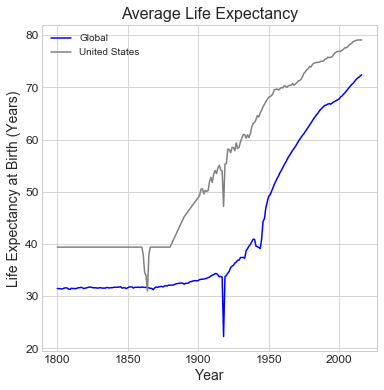

In [29]:
# Plot the average life expectancy each year globally and in the United States 
fig, ax = plt.subplots(figsize=(6,6));
fig1 = ax.plot(avg_life_exp.index, avg_life_exp, 'b', label='Global')
fig2 = ax.plot(us_avg_life_exp.index, us_avg_life_exp, 'grey', label='United States')
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Life Expectancy at Birth (Years)', fontsize = 14);
plt.title('Average Life Expectancy', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.legend()
plt.show()

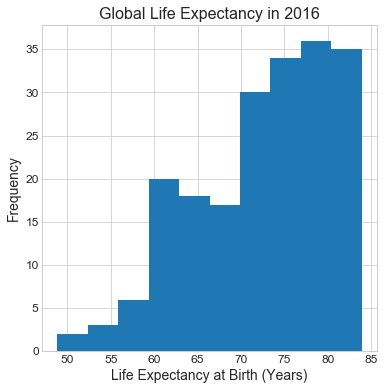

In [30]:
# Extract the life expectancy from the year 2016 and plot it as a histogram 
life_exp_2016 = life_exp_melt.query('year == 2016')
plt.figure(figsize=(6,6))
plt.hist(life_exp_2016['life_expectancy']);
plt.xlabel('Life Expectancy at Birth (Years)', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);
plt.title('Global Life Expectancy in 2016', fontsize = 16);
plt.tick_params(labelsize = 12)
plt.show()

In [31]:
# Determine descriptive statistics about the life expectancy data in 2016 
life_exp_2016['life_expectancy'].describe()

count    201.000000
mean      72.428507
std        7.776782
min       48.860000
25%       67.100000
50%       74.500000
75%       78.600000
max       83.900000
Name: life_expectancy, dtype: float64

In [32]:
# Determine the life expectancy in the United States in 2016 
life_exp_2016.query('country == "United States"')

,country,year,life_expectancy
43604,United States,2016,79.1


In [33]:
# Determine the country with the highest life expectancy in 2016 
life_exp_2016.loc[life_exp_2016['life_expectancy'].idxmax()]

country            Hong Kong, China
year                           2016
life_expectancy                83.9
Name: 43493, dtype: object

In [34]:
# Determine the country with the highest life expectancy in 2016 
life_exp_2016.loc[life_exp_2016['life_expectancy'].idxmin()]

country            Lesotho
year                  2016
life_expectancy      48.86
Name: 43516, dtype: object

Since 1800, the average life expectancy has increased by approximately 40 years globally as well as in the United States. Life expectancy in the United States has remained consistently higher than the global average. Life expectancies remained fairly constant for much of the 1800s. In the United States, life expectancies began increasing dramatically beginning around 1870. Globally, the dramatic increase began around 1920. It is interesting to note the years where significant drops in life expectancy was observed. In the United States, these drops correspond to the Civil War, lasting between 1861-1865, and WWI, lasting between 1914 and 1918. Globally, the largest drop also corresponds to WWI, with a smaller drop observed during WWII. 

The distribution of life expectancy data in 2016 (the year for which the most recent data is available) is left-skewed. The difference between the third quartile and the maximum of the data is only 5.3 years, while the difference between the minimum and the first quartile is 18.2 years. The average life expectancy in the United States is above the third quartile. The country with the highest life expectancy is Hong Kong (China), while the country with the lowest life expectancy is Lesotho. These results suggest that although average global life expectancies have risen dramatically over the last century, there are still countries today where life expectancy remains low. 

### Child Mortality Rates Over Time Globally and in the U.S.

In [35]:
# Calculate the global mean child mortality rate each year 
avg_child_mort = child_mort_melt.groupby('year')['under_5_mortality'].mean()

In [36]:
# Extract the mean child mortality rate each year in the United States
us_avg_child_mort = child_mort_melt.query('country == "United States"').groupby('year')['under_5_mortality'].mean()

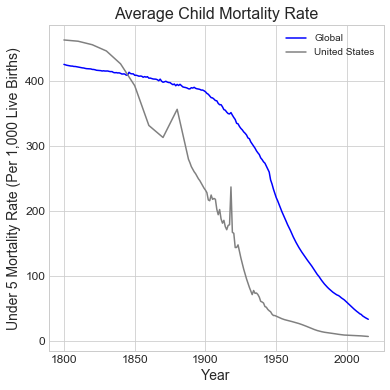

In [37]:
# Plot the average child mortality rate each year globally and in the United States 
fig, ax = plt.subplots(figsize=(6,6));
fig1 = ax.plot(avg_child_mort.index, avg_child_mort, 'b', label='Global')
fig2 = ax.plot(us_avg_child_mort.index, us_avg_child_mort, 'grey', label='United States')
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Under 5 Mortality Rate (Per 1,000 Live Births)', fontsize = 14);
plt.title('Average Child Mortality Rate', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.legend()
plt.show()

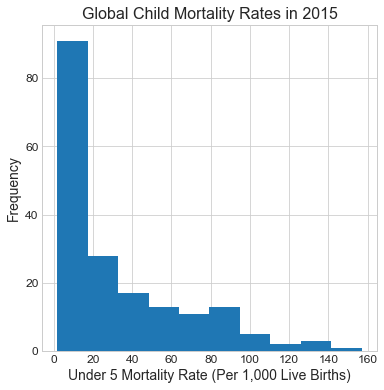

In [38]:
# Extract the child mortality rate from the year 2015 and plot it as a histogram 
child_mort_2015 = child_mort_melt.query('year == 2015')
plt.figure(figsize=(6,6))
plt.hist(child_mort_2015['under_5_mortality']);
plt.xlabel('Under 5 Mortality Rate (Per 1,000 Live Births)', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);
plt.title('Global Child Mortality Rates in 2015', fontsize = 16);
plt.tick_params(labelsize = 12)
plt.show()

In [39]:
# Determine descriptive statistics about the child mortality rate data in 2015
child_mort_2015['under_5_mortality'].describe()

count    184.000000
mean      32.961413
std       33.495984
min        1.900000
25%        8.050000
50%       17.700000
75%       49.700000
max      156.900000
Name: under_5_mortality, dtype: float64

In [40]:
# Determine the child mortality rate in the United States in 2015
child_mort_2015.query('country == "United States"')

,country,year,under_5_mortality
39733,United States,2015,6.5


In [41]:
# Determine the country with the lowest child mortality rate in 2015
child_mort_2015.loc[child_mort_2015['under_5_mortality'].idxmin()]

country              Luxembourg
year                       2015
under_5_mortality           1.9
Name: 39657, dtype: object

In [42]:
# Determine the country with the highest child mortality rate in 2015
child_mort_2015.loc[child_mort_2015['under_5_mortality'].idxmax()]

country              Angola
year                   2015
under_5_mortality     156.9
Name: 39563, dtype: object

Since 1800, the average child mortality rate has decreased by approximately 400 per 1000 live births globally. In the United States, the decrease is approximately 450 per 1000 live births. Child mortality rates in the United States were higher than the global average prior to the late 1840s, but have been consistently lower than the global average since then. Life expectancies remained fairly constant for much of the 1800s. Again, it is interesting to note the years where significant increases in child mortality was observed. In the United States, these increases correspond to the Civil War and WWI, like for life expectancy. Globally, however, there are no observable spikes in child mortality.

The distribution of child mortality rate data in 2015 (the year for which the most recent data is available) is right-skewed. The difference between the third quartile and the maximum of the data is 107.2, while the difference between the minimum and the first quartile is only 6.2. The average child mortality rate in the United States is below the first quartile. The country with the lowest child mortality rates is Luxembourg, while the country with the highest child mortality rates is Angola. Similar to for life expectancy results, these results suggest that although average global child mortality rates have declined dramatically over the last century, there are still countries today where child mortality rates remain high. 

### Per Capita Total Health Spend Over Time Globally and in the U.S.

In [43]:
# Calculate the global mean total health spend each year 
avg_health_spend = health_spend_melt.groupby('year')['per_capita_health_spend'].mean()

In [44]:
# Extract the mean total health spend each year in the United States
us_avg_health_spend = health_spend_melt.query('country == "United States"').groupby('year')['per_capita_health_spend'].mean()

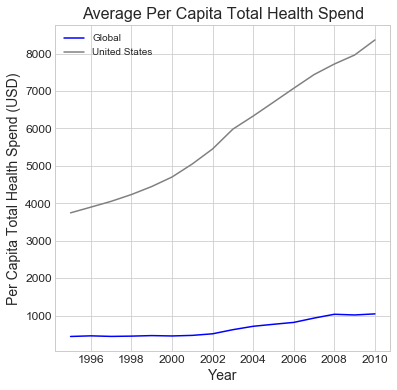

In [45]:
# Plot the average total health spend per person each year globally and in the United States 
fig, ax = plt.subplots(figsize=(6,6));
fig1 = ax.plot(avg_health_spend.index, avg_health_spend, 'b', label='Global')
fig2 = ax.plot(us_avg_health_spend.index, us_avg_health_spend, 'grey', label='United States')
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Per Capita Total Health Spend (USD)', fontsize = 14);
plt.title('Average Per Capita Total Health Spend', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.legend()
plt.show()

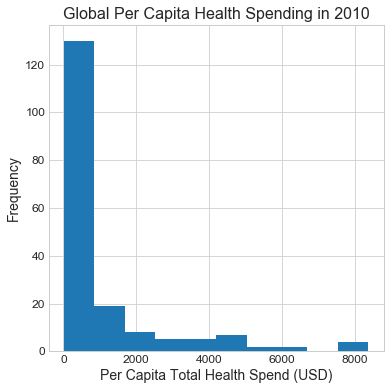

In [46]:
# Extract the total health spend data from the year 2010 and plot it as a histogram 
health_spend_2010 = health_spend_melt.query('year == 2010')
health_spend_2010_clean = health_spend_2010.dropna()
plt.figure(figsize=(6,6))
plt.hist(health_spend_2010_clean['per_capita_health_spend']);
plt.xlabel('Per Capita Total Health Spend (USD)', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);
plt.title('Global Per Capita Health Spending in 2010', fontsize = 16);
plt.tick_params(labelsize = 12)
plt.show()

In [47]:
# Determine descriptive statistics about the total health spend data in 2010
health_spend_2010['per_capita_health_spend'].describe()

count     182.000000
mean     1050.549501
std      1732.613824
min        11.903500
25%        82.540371
50%       344.472748
75%       911.881691
max      8361.732117
Name: per_capita_health_spend, dtype: float64

In [48]:
# Determine the health spend per person in the United States in 2010
health_spend_2010.query('country == "United States"')

,country,year,per_capita_health_spend
2904,United States,2010,8361.732117


In [49]:
# Determine the country with the lowest health spend per person in 2010
health_spend_2010.loc[health_spend_2010['per_capita_health_spend'].idxmin()]

country                    Eritrea
year                          2010
per_capita_health_spend    11.9035
Name: 2783, dtype: object

In [50]:
# Determine the country with the highest health spend per person in 2010
health_spend_2010.loc[health_spend_2010['per_capita_health_spend'].idxmax()]

country                    United States
year                                2010
per_capita_health_spend          8361.73
Name: 2904, dtype: object

The average global per capital total health spending has approximately doubled over the past 15 years. In that time window, the average per capital total health spending in the United States has been consistently about 8 times greater than the global average. The distribution of per capital total health spending in 2010 is right-skewed. The country with the smallest per capita health spending in 2010 was Eritrea, spending only 11.9 USD per person versus 8361.7 USD per person for the United States

### Correlations Between Health Spending, Life Expectancy, and Child Mortality
In this section, I will join DataFrames to enable multi-variable analysis. 

In [51]:
# Inner join life expectancy and child mortality tables on country and year to enable comparison 
life_exp_child_mort = life_exp_melt.merge(child_mort_melt, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
life_exp_child_mort.head()

,country,year,life_expectancy,under_5_mortality
0,Afghanistan,1800,28.21,468.58
1,Albania,1800,35.40,375.20
2,Algeria,1800,28.82,460.21
3,Angola,1800,26.98,485.68
4,Antigua and Barbuda,1800,33.54,473.60


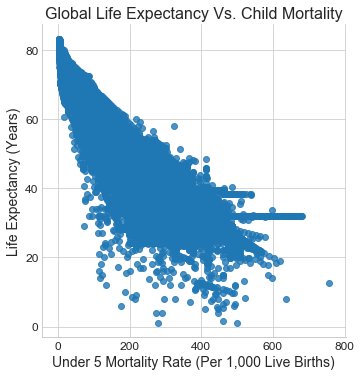

In [52]:
# Create a scatter plot of life expectancy vs. child mortality for all countries colored by year 
plt.figure(figsize=(6,6));
sns.lmplot('under_5_mortality', 'life_expectancy', data=life_exp_child_mort, fit_reg=False);
plt.xlabel('Under 5 Mortality Rate (Per 1,000 Live Births)', fontsize = 14);
plt.ylabel('Life Expectancy (Years)', fontsize = 14);
plt.title('Global Life Expectancy Vs. Child Mortality', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.show();

There is an observable negative correlation between life expectancy and child mortality rates, consistent with the dependence of the life expectancy (at birth) calculation on child mortality rates.

In [53]:
# Inner join health spend and life expectancy tables on country and year to enable comparison 
health_spend_life_exp = life_exp_melt.merge(health_spend_melt, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
health_spend_life_exp.head()

,country,year,life_expectancy,per_capita_health_spend
0,Albania,1995,73.7,27.910805
1,Algeria,1995,71.6,62.055538
2,Angola,1995,50.9,15.568388
3,Antigua and Barbuda,1995,73.5,350.719298
4,Argentina,1995,73.5,615.260409


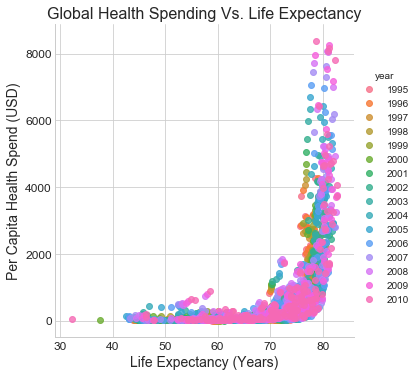

In [54]:
# Create a scatter plot of health spend vs. life expectancy for all countries colored by year 
plt.figure(figsize=(6,6));
sns.lmplot('life_expectancy', 'per_capita_health_spend', data=health_spend_life_exp, hue='year', fit_reg=False);
plt.xlabel('Life Expectancy (Years)', fontsize = 14);
plt.ylabel('Per Capita Health Spend (USD)', fontsize = 14);
plt.title('Global Health Spending Vs. Life Expectancy', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.show();

Plotting per capita health spending versus life expectancy shows an interesting result. All countries with low life expectancy (less than 70 years) also have low per capita health spending. However, countries with high life expectancy (greater than 70 years) have a wide distribution of per capita health spending. Some countries with very high life expectancies spend no more on health per capita than countries with very low life expectancies. These results suggest that additional factors have measurable impacts on life expectancy than health spending. Further statistical analysis is required to assess the correlation between per capita health spending and life expectancy. 

In [55]:
# Inner join health spend and child mortality tables on country and year to enable comparison 
health_spend_child_mort = child_mort_melt.merge(health_spend_melt, how='inner', left_on=['country', 'year'], right_on=['country', 'year'])
health_spend_child_mort.head()

,country,year,under_5_mortality,per_capita_health_spend
0,Albania,1995,33.2,27.910805
1,Algeria,1995,42.6,62.055538
2,Angola,1995,224.8,15.568388
3,Antigua and Barbuda,1995,19.7,350.719298
4,Argentina,1995,23.4,615.260409


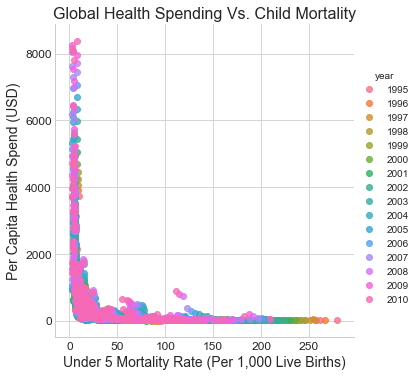

In [56]:
# Create a scatter plot of health spend vs. child mortality for all countries colored by year 
plt.figure(figsize=(6,6));
sns.lmplot('under_5_mortality', 'per_capita_health_spend', data=health_spend_child_mort, hue='year', fit_reg=False);
plt.xlabel('Under 5 Mortality Rate (Per 1,000 Live Births)', fontsize = 14);
plt.ylabel('Per Capita Health Spend (USD)', fontsize = 14);
plt.title('Global Health Spending Vs. Child Mortality', fontsize = 16);
plt.tick_params(labelsize = 12);
plt.show();

Plotting per capita total health spending versus child mortality shows a similar result as for life expectancy above. All countries with high child mortality rates (greater than 30 deaths per 1000 live births) also have low per capita health spending. However, countries with low child mortality rates (less than 30 deaths per 1000 live births) have a wide distribution of per capita health spending. Some countries with very low child mortality rates spend no more on health per capita than countries with very high child mortality rates. These results suggest that additional factors have measurable impacts on child mortality rates than health spending. Further statistical analysis is required to assess the correlation between per capita health spending and child mortality. 

<a id='conclusions'></a>
## Conclusions

In this project, I explored data on life expectancy, child mortality, and per capital health spending from <a href=https://www.gapminder.org/data/>Gapminder World</a>. After assessing and cleaning the data for analysis, I performed exploratory data analysis by creating visuals and calculating descriptive statistics to answer some interesting questions about population health outcomes around the world and how they have changed over time. 

The overall findings from my exploratory data analysis show that life expectancies have risen dramatically over the last 100 years while child mortality rates have dramatically declined. Since life expectancy (calculated at birth) is strongly dependent on child mortality rates, it is consistent that there is a negative correlation between the two variables. For both indicators, the United States performs better than the global average, sitting above the third quartile for life expectancy and below the first quartile for child mortality. However, despite global progress, there are still countries today where low life expectancies and high child mortality rates are observed. Further, my exploratory data analysis suggests that per capita total health spending does not directly correlate with life expectancies or child mortality rates, as there are an abundance of countries with low per capital health spending and good survival outcomes. Follow-up statistical analysis is required to shed additional light on the correlation of per capita health spending and population survival outcomes.  

This analysis revealed interesting insights on population health data around the world. While this analysis only focused on three indicators, there is a diverse array of indicators that have measurable impacts on population health. In conclusion, I think this analysis brings up a couple of interesting questions, including how best to improve health outcomes in countries with poor life expectancies today and how best to improve health outcomes while lowering healthcare spending. 